
<a href="https://colab.research.google.com/github/kokchun/Databehandling-21/blob/main/Exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Find missing values (*)

# a)
Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

In [67]:
import pandas as pd
# C:\Users\Xiu\Documents\GitHub\Databehandling_Xiu\datasource
student = pd.read_csv("../datasource/student-mat-missing-data.csv")
student.head(5)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


# b) 
Do some initial explorations with the methods to get an understanding of the dataset:

In [68]:
student.shape

(395, 34)

In [69]:
student["Mjob"].unique()
#df["sex"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [71]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [72]:
student["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [73]:
student["age"].isnull().sum()

14

In [74]:
student.age.isnull().sum()

14

## c)
Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py.

When you come across more useful functions, you can store them in your data_utils module. 

# d)
Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

In [75]:
missing=student.isnull().sum()
print(missing)

Unnamed: 0     0
school         0
sex            0
age           14
address        5
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         5
freetime      16
goout          5
Dalc           0
Walc           0
health         5
absences       5
G1             0
G2             0
G3             0
dtype: int64


In [76]:
student.age.describe() 

count    381.000000
mean      16.700787
std        1.275157
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

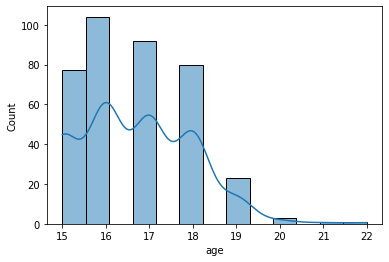

In [81]:
# Histogram of the age distribution for male and female 
import seaborn as sns  
sns.histplot(data= student, x="age", kde=True)
#核密度估计Kernel Density Estimation(KDE)

<AxesSubplot:xlabel='age', ylabel='Count'>

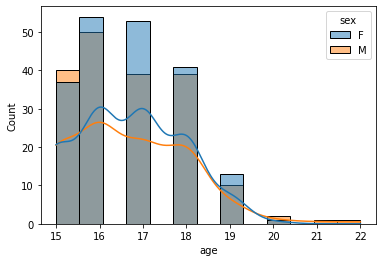

In [78]:
# Histogram of the age distribution for male and female 
import seaborn as sns  
sns.histplot(data= student, x="age", kde=True,hue="sex")
#核密度估计Kernel Density Estimation(KDE)

# e) 
Find all rows where the freetime is NaN.   

In [93]:
student[student["freetime"].isna()] #all rows with NAN under a single dataframe column
#student[student["freetime"].isnull()] 一样的结果

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18



# f) 
Find all rows where the freetime **or** the age is NaN.  

In [107]:
student1=student[student["freetime"].isna() | student["age"].isna()]
# "&" 表示 and"," |" 表示 or
student1


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [112]:
student2=student1.loc[:,["age","freetime"]]
student2

,age,freetime
20,NaN,4.0
71,NaN,3.0
87,15.0,NaN
99,16.0,NaN
102,NaN,3.0
106,NaN,1.0
121,NaN,5.0
130,15.0,NaN
149,15.0,NaN
151,16.0,NaN


In [113]:
len(student2) # age or freeman is Nan

25

In [119]:
student3=student2[student2["age"].isna() & student2["freetime"].isna()]
student3


,age,freetime
160,NaN,NaN
191,NaN,NaN
276,NaN,NaN
293,NaN,NaN
385,NaN,NaN


In [120]:
len(student3)

5

In [ ]:
propotion=len(student3)/len(student2)
propotion

# g)
 You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.
 
 您会注意到某些行有多个 NaN。 现在计算这些行构成整个数据集的比例。

0.2

# 2 Clean the data 

# a)
As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.

当有太多缺失数据需要填写，且比例小到可以删除不计。

Now remove these rows and use your missing-value utility function visualize the remaining NaNs.

现在删除这些行并使用您的缺失值效用函数可视化剩余的 NaN。

# b)
The domain expert has told you that you have to fill in the missing age values.

领域专家告诉您，您必须填写缺失的年龄值。

Start with visualising the age distribution in the dataset using a histogram. 

首先使用直方图可视化数据集中的年龄分布。

# c)

Check which columns there are in the dataset to see what can be utilised in determining the age.

检查数据集中有哪些列，以了解可用于确定年龄的内容。

# d)
The column "higher" seems interesting. Let's see which unique values it can have. 

# e)
Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

# f)
 That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

 Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

# g)
 Make a barchart for alcohol consumption vs age.

# h) 
We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values.

---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods